# Analiza podatkov evrolige
Tu bom analiziral podatke evrolige in ovrgel ali pa sprejel hipoteze.

In [6]:
# Naložim pandas
import pandas as pd

# povem mu da vedno samo 10 vrstic tabele izpiše
pd.options.display.max_rows = 10

# pripravim si orodje za risanje grafov
%matplotlib inline

# nalozim si podatke

trenerji = pd.read_csv('podatki\\trenerji.csv', index_col='klub')
igralci = pd.read_csv('podatki\\igralci.csv', index_col='klub')
statistika = pd.read_csv('podatki\\statistika-ekip.csv', index_col = 'klub')
tekme = pd.read_csv('podatki\\tekme.csv', index_col = 'klub')

Tu bom obravnaval trenerje
Najprej pogledam kaksna je tabela

In [5]:
trenerji

,sezona,ime,funkcija,narodnost,rojstvo
klub,,,,,
AEK,2000,"IVKOVIC, DUSAN",Head coach,Serbia,1943
AEK,2001,"SAKOTA, DRAGAN",Head coach,Greece,1952
AEK,2002,"SAKOTA, DRAGAN",Head coach,Greece,1952
AEK,2003,"KATSIKARIS, FOTIS",Head coach,Greece,1967
AEK,2004,"KATSIKARIS, FOTIS",Head coach,Greece,1967
...,...,...,...,...,...
ZAL,2014,"KRAPIKAS, GINTARAS",Head coach,Lithuania,1961
ZAL,2015,"JASIKEVICIUS, SARUNAS",Head coach,Lithuania,1976
ZAL,2016,"JASIKEVICIUS, SARUNAS",Head coach,Lithuania,1976


In [8]:
trenerji.sort_values('rojstvo')

,sezona,ime,funkcija,narodnost,rojstvo
klub,,,,,
ZAD,2000,"VANJAK, VLADO",Head coach,Croatia,1753
VER,2000,"FAINA, FILIPPO",Head coach,Italy,1753
OVA,2000,"ARAUJO, EDUARDO JORGE",Head coach,Portugal,1753
PAO,2000,"FLEVARAKIS, KOSTAS",Head coach,Greece,1753
CSK,2002,"IVKOVIC, DUSAN",Head coach,Serbia,1943
...,...,...,...,...,...
ZAL,2017,"JASIKEVICIUS, SARUNAS",Head coach,Lithuania,1976
ZAL,2015,"JASIKEVICIUS, SARUNAS",Head coach,Lithuania,1976
ZAL,2016,"JASIKEVICIUS, SARUNAS",Head coach,Lithuania,1976


In [23]:
stevilo_sezon_za_trenerje = trenerji.groupby('ime').size()

AttributeError: 'Series' object has no attribute 'top'

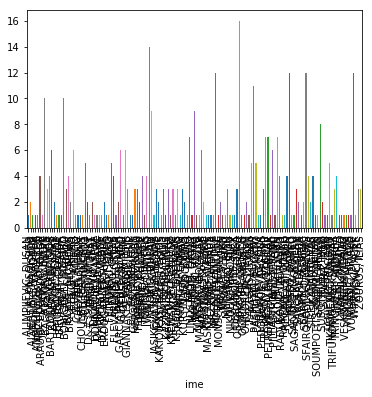

In [24]:
stevilo_sezon_za_trenerje.plot.bar()

In [7]:
statistika

,vrsta_podatka,sezona,kje,kratica,st_tekem,podatek,povprecje,na_40_min
klub,,,,,,,,
Tau Ceramica,podaje,2000,doma,BAS,10,140,10.0,2.80
Benetton Basket,podaje,2000,doma,TRE,7,104,7.0,2.97
Kinder Bologna,podaje,2000,doma,VIR,12,104,12.0,1.72
AEK Athens,podaje,2000,doma,AEK,10,102,10.0,2.01
Olympiakos,podaje,2000,doma,OLY,7,99,7.0,2.83
...,...,...,...,...,...,...,...,...
FC Barcelona Lassa,izgubljene zoge,2017,v gosteh,BAR,15,183,15.0,2.44
Anadolu Efes Istanbul,izgubljene zoge,2017,v gosteh,IST,15,182,15.0,2.43
Maccabi FOX Tel Aviv,izgubljene zoge,2017,v gosteh,TEL,15,174,15.0,2.32
